In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import functions as fct

# Importation des données

In [5]:
data = pd.read_csv("data2.txt")

In [63]:
data = data.rename(columns={"2104":"X1","3":"X2","399900":"y"})

In [118]:
data.describe()

,X1,X2,y
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


# Feature scaling

In [66]:
X1 = data["X1"].to_numpy()

In [8]:
X2 = data["X2"].to_numpy()

In [126]:
X1_normalized = (X1-np.mean(X1))/(np.max(X1)-np.min(X1))

In [74]:
X2_normalized = (X2-np.mean(X2))/(np.max(X2)-np.min(X2))

In [76]:
m = data.shape[0]
X_transformed = np.array([[1, X1_normalized[i], X2_normalized[i]] for i in range(m)])

In [77]:
y = data["y"].to_numpy()

In [125]:
normalized_data = pd.DataFrame([[X1_normalized[i],X2_normalized[i],y[i]] for i in range(m)],columns=["X1","X2","y"])
normalized_data.head()

,X1,X2,y
0,-0.109883,-0.043478,329900
1,0.110746,-0.043478,369000
2,-0.160627,-0.293478,232000
3,0.276218,0.206522,539900
4,-0.003705,0.206522,299900


# Définition des Paramètres

In [79]:
theta=np.array([0,0,0])

In [95]:
alpha = 0.1

In [96]:
n_iter = 50

# Gradient descendant 

In [97]:
theta_predict = fct.gradient_descent_multiple(X_transformed, y, theta, alpha, n_iter)[0]
theta_predict

[337371.7110743975, 101767.78676464088, 42692.04470378521]

In [117]:
y_predict = np.dot(X_transformed, theta_predict)

# Calcul du coût et choix de alpha

In [99]:
cost_values = fct.gradient_descent_multiple(X_transformed, y, theta, alpha, n_iter)[1]

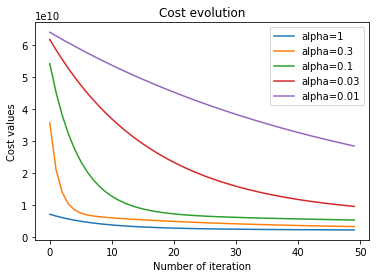

In [116]:
figure = plt.figure
plt.title("Cost evolution");
plt.xlabel("Number of iteration");
plt.ylabel("Cost values");
for alpha in [1,0.3,0.1,0.03, 0.01]:
    cost_values = fct.gradient_descent_multiple(X_transformed, y, theta, alpha, n_iter)[1]
    plt.plot(range(n_iter),cost_values)
plt.legend(['alpha=1','alpha=0.3','alpha=0.1','alpha=0.03', 'alpha=0.01'])
    